In [13]:
# !pip install bert-for-tf2
!pip3 install simpletransformers
# !pip3 install -U scikit-learn scipy matplotlib

  Using cached simpletransformers-0.63.7-py3-none-any.whl (249 kB)
  Using cached streamlit-1.10.0-py2.py3-none-any.whl (9.1 MB)
  Using cached seqeval-1.2.2.tar.gz (43 kB)
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 4.4 MB 3.5 MB/s            
     |████████████████████████████████| 281 kB 16.2 MB/s            
  Using cached sentencepiece-0.1.96.tar.gz (508 kB)
  Preparing metadata (setup.py) ... done
  Using cached wandb-0.12.21-py2.py3-none-any.whl (1.8 MB)
     |████████████████████████████████| 78 kB 23.6 MB/s             
     |████████████████████████████████| 5.8 MB 4.1 MB/s            
     |████████████████████████████████| 220 kB 7.1 MB/s            
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached datasets-2.3.2-py3-none-any.whl (362 kB)
     |████████████████████████████████| 173 kB 23.8 MB/s            
     |██████████████████████████

In [10]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

df2 = pd.read_csv('compassion.csv')
df2 = df2.loc[df2['Score'] >= 2]
df2 = df2[['Body', 'y']]
df2.columns = ['text', 'label']
df2.head(5)
df2.describe()

,label
count,6860.000000
mean,0.602332
std,0.489452
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


<AxesSubplot:ylabel='Frequency'>

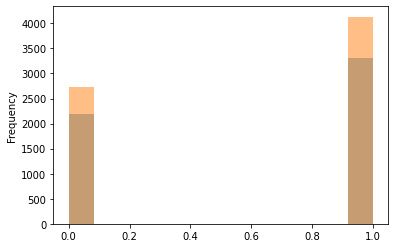

In [11]:
from sklearn.model_selection import train_test_split

X = df2["text"]
y = df2["label"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,shuffle=True, stratify=y)

train = pd.concat([X_train,y_train], axis=1)
test = pd.concat([X_test,y_test], axis=1)

train['label'].plot.hist(bins=12, alpha=0.5)

df2['label'].plot.hist(bins=12, alpha=0.5)


In [14]:
from simpletransformers.classification import ClassificationModel


# Create a TransformerModel
model = ClassificationModel('bert', 'bert-base-cased',use_cuda='cuda_available', args={'num_train_epochs': 2,  'overwrite_output_dir': True,'wandb_project': 'compassion'})


ModuleNotFoundError: No module named 'simpletransformers'

In [ ]:
# Train the model
model.train_model(train)


# Evaluate the model
result, model_outputs, wrong_predictions = model.eval_model(test)

In [ ]:
accuracy = (result['tp']+result['tn'])/(result['tp']+result['tn']+result['fp']+result['fn'])
print(accuracy)
result


In [ ]:
predictions, raw_outputs = model.predict(["you are doing great", "this is not helpful", "this is a statement"])

predictions




In [ ]:
#FITTING THE CLASSIFICATION MODEL using Logistic Regression(tf-idf)
lr_tfidf=LogisticRegression(solver = 'liblinear', C=10, penalty = 'l2')
lr_tfidf.fit(X_train, y_train)
#Predict y value for test dataset
y_predict = lr_tfidf.predict(X_test)
y_prob = lr_tfidf.predict_proba(X_test)[:,1]
print(classification_report(y_test,y_predict))
print('Confusion Matrix:',confusion_matrix(y_test, y_predict))
 
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)

In [ ]:
#FITTING THE CLASSIFICATION MODEL using Naive Bayes(tf-idf)
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_vectors_tfidf, y_train)  
#Predict y value for test dataset
y_predict = nb_tfidf.predict(X_test_vectors_tfidf)
y_prob = nb_tfidf.predict_proba(X_test_vectors_tfidf)[:,1]
print(classification_report(y_test,y_predict))
print('Confusion Matrix:',confusion_matrix(y_test, y_predict))
 
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)


In [ ]:
new = ["With a huge standard deviation"]
tfidf_vectorizer = TfidfVectorizer(use_idf=True)
tfidf_vectorizer.fit_transform(X_train) 
new_vectors_tfidf = tfidf_vectorizer.transform(new)
y_predict = nb_tfidf.predict(new_vectors_tfidf)
y_predict[0]

In [ ]:
import gradio as gr

def wrapper(str):
    predictions, raw_outputs = model.predict([str])
    return predictions[0]
    
app = gr.Interface(
    wrapper,
    inputs=[
        gr.Textbox(label="Text", value=""),
    ],
    outputs=["text"],
)

app.launch()